# Libraries

In [1]:
import wntr
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd


In [2]:
def load_network(inp_file):
    """ Load a network model from an EPANET .inp file """
    wn = wntr.network.WaterNetworkModel(inp_file)
    return wn

In [3]:
waterNetwork=load_network("Net3.inp")

# Network Plotting and description

In [4]:
waterNetwork.describe(level=2)

{'Nodes': {'Junctions': 92, 'Tanks': 3, 'Reservoirs': 2},
 'Links': {'Pipes': 117,
  'Pumps': {'Head': 2, 'Power': 0},
  'Valves': {'PRV': 0, 'PSV': 0, 'PBV': 0, 'TCV': 0, 'FCV': 0, 'GPV': 0}},
 'Patterns': 5,
 'Curves': {'Pump': 2, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 6}

In [5]:
print("Junctions name: ",waterNetwork.junction_name_list)
print("total number of junctions",len(waterNetwork.junction_name_list))

Junctions name:  ['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275']
total number of junctions 92


In [6]:
print("Tanks name: ",waterNetwork.tank_name_list)

Tanks name:  ['1', '2', '3']


In [7]:
print('Link names:',waterNetwork.link_name_list)

Link names: ['20', '40', '50', '60', '101', '103', '105', '107', '109', '111', '112', '113', '114', '115', '116', '117', '119', '120', '121', '122', '123', '125', '129', '131', '133', '135', '137', '145', '147', '149', '151', '153', '155', '159', '161', '163', '169', '171', '173', '175', '177', '179', '180', '181', '183', '185', '186', '187', '189', '191', '193', '195', '197', '199', '201', '202', '203', '204', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '229', '231', '233', '235', '237', '238', '239', '240', '241', '243', '245', '247', '249', '251', '257', '261', '263', '269', '271', '273', '275', '277', '281', '283', '285', '287', '289', '291', '293', '295', '297', '299', '301', '303', '305', '307', '309', '311', '313', '315', '317', '319', '321', '323', '325', '329', '330', '333', '10', '335']


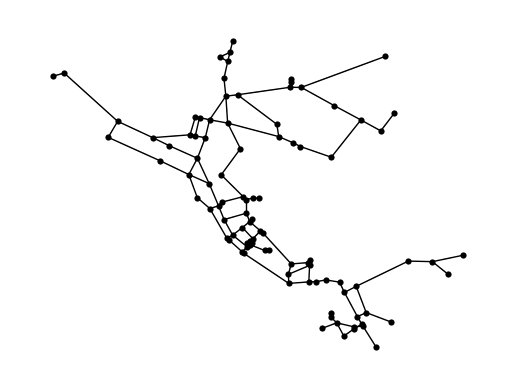

<Axes: >

In [8]:
wntr.graphics.plot_network(waterNetwork)

# Analyzing Baseline Network Performance

In [9]:
sim = wntr.sim.EpanetSimulator(waterNetwork)
results = sim.run_sim()

In [10]:
node_results = results.node
link_results = results.link

In [12]:
pressure = node_results['pressure']
print("Pressure results in PSI():\n", pressure)


Pressure results in PSI():
 name          10         15         20         35        40        50  \
0      -0.450070  28.593657   8.839204  40.612469  3.992880  7.162800   
3600   28.253721  28.887156   9.099179  41.513771  4.191203  6.752899   
7200   28.764309  30.003231   9.450786  42.429108  4.620553  6.369764   
10800  28.871420  30.415579   9.869709  42.817181  5.158957  6.534997   
14400  29.659281  31.970745  10.284730  44.297886  5.665973  6.740044   
18000  29.004883  36.064419  10.455683  42.687435  6.064279  7.254008   
21600  29.098961  36.198051  10.400481  42.923595  6.269197  7.563003   
25200  28.957567  39.759125  10.501099  42.958897  6.488416  7.892843   
28800  29.072077  39.920292  10.598804  43.130390  6.604171  8.048806   
32400  28.951454  39.794704  10.712960  43.143570  6.757488  8.261295   
36000  28.957239  39.742531  10.623417  43.150753  6.767004  8.352076   
39600  28.854168  35.978443  10.552444  43.097820  6.761120  8.441968   
43200  28.856670  35.90

In [13]:
flow = link_results['flowrate']
print("Flow rate results:\n", flow)

Flow rate results:
 name         20        40        50        60           101       103  \
0     -0.141719 -0.029042  0.020770  0.830133  6.040704e-09  0.010603   
3600  -0.191671 -0.062873  0.019414  0.824086  2.167272e-01  0.116475   
7200  -0.228370 -0.078843 -0.008372  0.818413  2.101061e-01  0.112424   
10800 -0.226241 -0.074246 -0.010390  0.815749  2.086967e-01  0.111710   
14400 -0.283993 -0.100968 -0.035917  0.806910  1.980931e-01  0.105608   
18000  0.030093 -0.030008 -0.015657  0.489023  2.069300e-01  0.109588   
21600 -0.054849 -0.032102 -0.016713  0.484718  2.056777e-01  0.108909   
25200 -0.053264 -0.016951 -0.007903  0.483575  2.075577e-01  0.109896   
28800 -0.062232 -0.022452 -0.010767  0.481465  2.060362e-01  0.109094   
32400  0.048814 -0.001393 -0.004600  0.486871  2.076387e-01  0.109832   
36000  0.038691  0.000862 -0.004555  0.487770  2.075620e-01  0.109754   
39600  0.059537  0.011948  0.000931  0.489574  2.089242e-01  0.110403   
43200  0.053066  0.008449 -0.00

In [14]:
total_simulation_time=flow.index[-1]/3600
print(total_simulation_time,"hrs")

24.0 hrs


In [15]:
pressure.describe()

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.000000,25.000000,25.000000
mean,16.524347,35.570499,9.924546,42.379959,5.836645,7.850260,65.123634,74.330536,74.330292,37.968559,...,40.279251,46.484501,44.381485,42.122879,41.284454,0.0,0.0,5.836645,7.850260,9.924544
std,14.308430,3.682220,0.575825,0.863204,0.847104,0.722632,0.958373,12.744168,12.744337,4.821449,...,1.140365,0.951456,0.866090,0.801828,0.790320,0.0,0.0,0.847104,0.722632,0.575826
min,-0.623553,28.593657,8.839204,40.612469,3.992880,6.369764,63.683887,65.671402,65.671021,31.380445,...,38.151543,44.650841,42.623016,40.477558,39.655293,0.0,0.0,3.992880,6.369764,8.839199
25%,1.291693,34.521534,9.450786,41.629910,5.271667,7.254008,63.813141,65.744255,65.743889,33.295692,...,39.561802,45.767307,43.621532,41.640804,40.841492,0.0,0.0,5.271667,7.254008,9.450771
50%,28.764309,35.978443,9.990775,42.440147,6.064279,8.124234,65.725700,65.804535,65.804192,41.517067,...,40.730850,46.730705,44.450729,42.284969,41.419266,0.0,0.0,6.064279,8.124239,9.990780
75%,28.957239,38.510681,10.443227,43.038048,6.621831,8.441968,65.796288,92.081741,92.081741,42.139488,...,41.129246,47.162857,45.034733,42.717964,41.870499,0.0,0.0,6.621831,8.441968,10.443227
max,29.659281,39.920292,10.712960,44.297886,6.767004,8.596177,65.834663,93.346977,93.346977,44.400757,...,42.755901,48.670105,46.327477,43.938866,43.075676,0.0,0.0,6.767004,8.596177,10.712964


In [16]:
flow.describe()

name,20,40,50,60,101,103,105,107,109,111,...,317,319,321,323,325,329,330,333,10,335
count,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000
mean,-0.021317,-0.005789,0.000538,0.600501,1.163357e-01,0.066034,0.037354,0.015567,0.056955,0.041182,...,0.007294,-0.000122,0.418525,0.001069,0.010571,0.600501,0.337046,3.370463e-01,0.116336,0.263455
std,0.122586,0.041185,0.014088,0.156301,1.052849e-01,0.050954,0.053589,0.011663,0.050388,0.049739,...,0.000367,0.002912,0.043578,0.008960,0.002547,0.156301,0.236136,2.361358e-01,0.105285,0.391998
min,-0.283993,-0.100968,-0.035917,0.481465,3.967796e-09,0.007750,-0.027763,-0.000781,-0.006284,-0.030665,...,0.006599,-0.004081,0.369796,-0.012997,0.006786,0.481465,0.000000,-3.219251e-08,0.000000,0.000000
25%,-0.107778,-0.029042,-0.007903,0.489574,5.173495e-09,0.010072,-0.019247,0.003278,0.002326,-0.009792,...,0.007019,-0.002420,0.379396,-0.005652,0.008043,0.489574,0.000000,-1.609626e-08,0.000000,0.000000
50%,0.030093,-0.000693,0.000368,0.504202,2.056777e-01,0.108909,0.079729,0.025420,0.099609,0.078586,...,0.007430,-0.000591,0.406976,0.003425,0.011344,0.504202,0.487770,4.877700e-01,0.205678,0.000000
75%,0.086164,0.024758,0.008835,0.815749,2.076387e-01,0.109896,0.084839,0.025627,0.100678,0.085224,...,0.007625,0.000286,0.445987,0.006118,0.012530,0.815749,0.500319,5.003186e-01,0.207639,0.815749
max,0.126217,0.050990,0.028879,0.833147,2.167272e-01,0.116475,0.086582,0.026062,0.101857,0.089357,...,0.007760,0.006157,0.492931,0.016104,0.015187,0.833147,0.515136,5.151361e-01,0.216727,0.833147


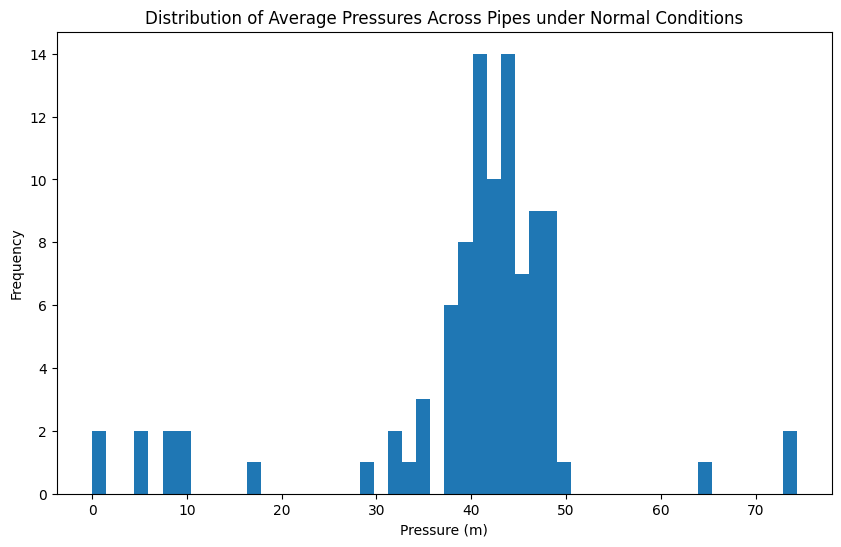

In [17]:
plt.figure(figsize=(10, 6))
pressure.mean(axis=0).plot(kind='hist', bins=50, title='Distribution of Average Pressures Across Pipes under Normal Conditions')
plt.xlabel('Pressure (m)')  
plt.ylabel('Frequency')
plt.show()


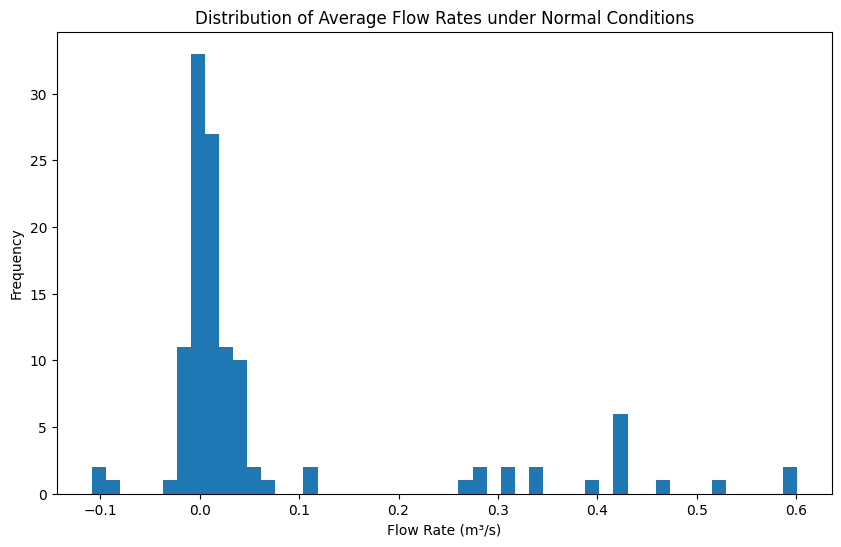

In [18]:
plt.figure(figsize=(10, 6))
flow.mean(axis=0).plot(kind='hist', bins=50, title='Distribution of Average Flow Rates under Normal Conditions')
plt.xlabel('Flow Rate (m³/s)')  
plt.ylabel('Frequency')
plt.show()

In [19]:
def averagePressureCV(wn):
    waterNetwork=load_network(wn)
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()
    
    pressure = results.node['pressure']
    
    pressure_range = pressure.max(axis=0) - pressure.min(axis=0)
    
    pressure_variability = pressure.std(axis=0)
    
    pressure_mean = pressure.mean(axis=0)
    pressure_cv = (pressure_variability / pressure_mean) * 100
    
    print(f"Pressure Range at each junction:\n {pressure_range}")
    print(f"Pressure Variability (Standard Deviation) at each junction:\n {pressure_variability}")
    print(f"Pressure Coefficient of Variation (CV) at each junction:\n {pressure_cv}")
    
    average_pressure_range = pressure_range.mean()
    average_pressure_variability = pressure_variability.mean()
    average_pressure_cv = pressure_cv.mean()
    average_pressure = pressure_mean.mean()
    
    print(f"Average Pressure Range across all junctions: {average_pressure_range:.2f} m")
    print(f"Average Pressure Variability (Standard Deviation) across all junctions: {average_pressure_variability:.2f} m")
    print(f"Average Pressure CV across all junctions: {average_pressure_cv:.2f}%")

    return average_pressure

In [20]:
def checkWaterserviceAvalibility(wn,t,requiredPressure):
    """Function to check water service availibility Under different scenarios
        Parameters:- 1) INP file 2) title.
        return: water service Availibility
    """
    waterNetwork=load_network(wn)
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()
    expected_demand = wntr.metrics.expected_demand(waterNetwork)
    demand = results.node['demand'].loc[:,waterNetwork.junction_name_list]
    wsa = wntr.metrics.water_service_availability(expected_demand.sum(axis=0), demand.sum(axis=0))
    ax = wntr.graphics.plot_network(waterNetwork, node_attribute=wsa, title=t)
    return wsa

In [21]:
def checkWaterage(wn,t,timeinterval):
    """Function to check water service availibility Under different scenarios
        Parameters:- 1) INP file 2) title. 3) Time interval in which we wanna see the water age(depends upon the size of network and simulation configurations)
        return: average water age
    """
    waterNetwork=load_network(wn)
    waterNetwork.options.quality.parameter = 'AGE'
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()

    age = results.node['quality']
    age_in_that_interval = age.loc[age.index[-1]-timeinterval*3600:age.index[-1]] #change this based on network size
    average_age = age_in_that_interval.mean()/3600 
    ax = wntr.graphics.plot_network(waterNetwork, node_attribute=average_age, title=t)
    return average_age

In [22]:
def plotWaterserviceAvailabilityOverTime(wn, t, requiredPressure):
    """Function to plot water service availability over time
       Parameters: 1) INP file 2) title 3) required pressure
       Returns: Time series plot of water service availability over time
    """
    waterNetwork = load_network(wn)
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure
    
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()

    expected_demand = wntr.metrics.expected_demand(waterNetwork)
    demand = results.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_time_series = wntr.metrics.water_service_availability(expected_demand.sum(axis=0), demand)

    plt.figure(figsize=(10, 6))
    plt.plot(wsa_time_series.index / 3600, wsa_time_series.mean(axis=1))
    plt.xlabel('Time (hours)')
    plt.ylabel('Average Water Service Availability')
    plt.title(t)
    plt.grid(True)
    plt.show()

    return wsa_time_series


In [23]:
def plotWaterAgeOverTime(wn, t):
    """Function to plot water age over time
       Parameters: 1) INP file 2) title
       Returns: Time series plot of water age over time
    """
    waterNetwork = load_network(wn)
    waterNetwork.options.quality.parameter = 'AGE'
    
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()

    age = results.node['quality']

    plt.figure(figsize=(10, 6))
    plt.plot(age.index / 3600, age.mean(axis=1))
    plt.xlabel('Time (hours)')
    plt.ylabel('Average Water Age (hours)')
    plt.title(t)
    plt.grid(True)
    plt.show()

    return age


In [24]:
average_pressure=averagePressureCV("Net3.inp")
print("\nThe average pressure of network is:",average_pressure)

Pressure Range at each junction:
 name
10       30.282833
15       11.326635
20        1.873756
35        3.685417
40        2.774124
           ...    
River     0.000000
Lake      0.000000
1         2.774124
2         2.226413
3         1.873765
Length: 97, dtype: float32
Pressure Variability (Standard Deviation) at each junction:
 name
10       14.308430
15        3.682220
20        0.575825
35        0.863204
40        0.847104
           ...    
River     0.000000
Lake      0.000000
1         0.847104
2         0.722632
3         0.575826
Length: 97, dtype: float32
Pressure Coefficient of Variation (CV) at each junction:
 name
10       86.589989
15       10.351894
20        5.802024
35        2.036822
40       14.513540
           ...    
River          NaN
Lake           NaN
1        14.513540
2         9.205203
3         5.802039
Length: 97, dtype: float32
Average Pressure Range across all junctions: 4.82 m
Average Pressure Variability (Standard Deviation) across all junctions: 

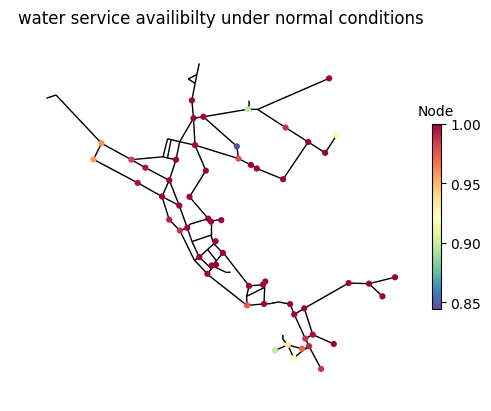

In [25]:
wsa=checkWaterserviceAvalibility('Net3.inp','water service availibilty under normal conditions', average_pressure) # Increase in pressure will lead to increase in wsa

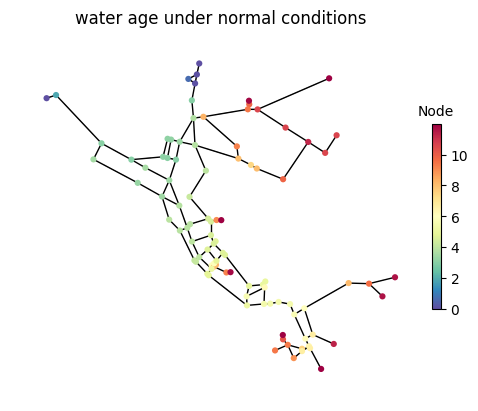

Average water age under Normal Conditions: 6.11 hours


In [26]:
waterage=checkWaterage('Net3.inp','water age under normal conditions',24)
print(f"Average water age under Normal Conditions: {waterage.mean():.2f} hours")

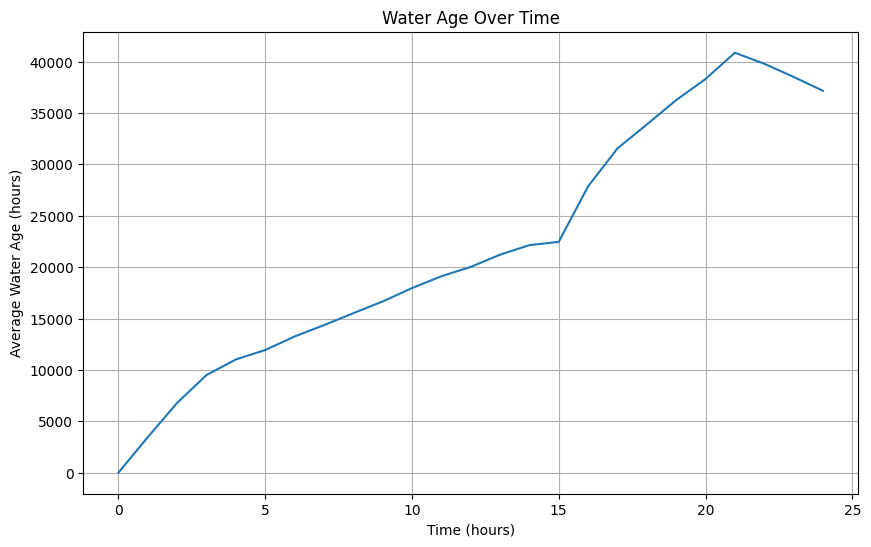

In [27]:
water_age_time_series = plotWaterAgeOverTime('Net3.inp', 'Water Age Over Time')


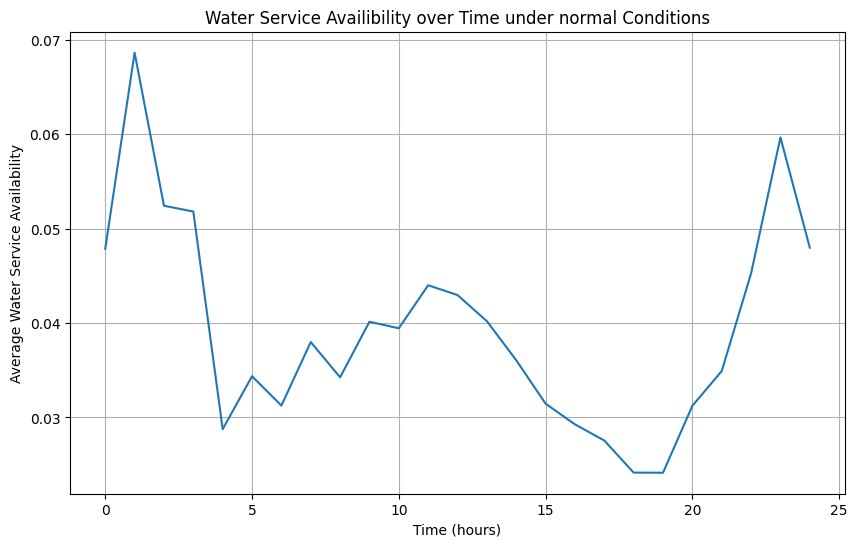

In [28]:
wsa_time=plotWaterserviceAvailabilityOverTime('Net3.inp',"Water Service Availibility over Time under normal Conditions",average_pressure)

In [29]:
# IDENTIFICATION OF CRITICAL AREAS OF NETWORK

In [30]:
def junctionsWithPopulation(wn):
    """This function is used to check Population at 
        Different Junctions
        wntr.metrics.population() is a WNTR utility that calculates population at junctions based on water demand patterns.
    """
    waterNetwork = load_network(wn)
    population=wntr.metrics.population(waterNetwork)
    junctionsWithpopulation=population[population>0]
    return junctionsWithpopulation

In [31]:
def criticalJunctions(wn, requiredPressure, threshold_population=100, threshold_wsa=0.8):
    """
    Function to identify critical junctions based on population and water service availability.
    
    Parameters:
    - wn: INP file
    - requiredPressure: Required pressure for calculating water service availability.
    - threshold_population: Minimum population at the junction to consider it critical.
    - threshold_wsa: Minimum water service availability to consider the junction critical.
    
    Returns:
    - critical_junctions: List of junctions that are critical based on the population and WSA thresholds.
    """
    waterNetwork = load_network(wn)

    population = wntr.metrics.population(waterNetwork)
    junctionsWithPopulation = population[population > threshold_population]
    
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()
    
    expected_demand = wntr.metrics.expected_demand(waterNetwork)
    demand = results.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa = wntr.metrics.water_service_availability(expected_demand, demand)
    
    critical_junctions = junctionsWithPopulation[wsa.mean() > threshold_wsa]
    
    print(f"Critical Junctions based on population > {threshold_population} and WSA > {threshold_wsa}:")
    print(critical_junctions)
    
    return critical_junctions


In [32]:
population_junctions=junctionsWithPopulation('Net3.inp')

In [33]:
mean_population=population_junctions.mean()
print(mean_population)

1336.135593220339


In [34]:
pop=criticalJunctions('Net3.inp',average_pressure,mean_population)

Critical Junctions based on population > 1336.135593220339 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
109     1782.0
119     1357.0
123     8596.0
203    32486.0
dtype: float64


In [35]:
sorted_junction_with_pop=pop.sort_values(ascending=False)
print(sorted_junction_with_pop)

203    32486.0
35     12371.0
123     8596.0
15      1902.0
109     1782.0
101     1463.0
119     1357.0
dtype: float64


# CREATION OF DISTURBANCE

In [36]:
waterNetwork=load_network('Net3.inp')
pumps = waterNetwork.pump_name_list


In [37]:
for pump in pumps:
       print(pump)

10
335


In [38]:
def addTimeBasedPumpControl(wn, pump_name, shut_time, on_time):
    """
    Function to add a time-based control to a pump to simulate power shortages.

    Parameters:
    - wn: Water network object (INP file)
    - pump_name: Name of the pump to control
    - shut_time: Time (in hours) when the pump shuts down
    - on_time: Time (in hours) when the pump is turned back on
    """
    pump = wn.get_link(pump_name)

    shut_action = wntr.network.controls.ControlAction(pump, 'status', 0) 
    shut_condition = wntr.network.controls.SimTimeCondition(wn, '>=', shut_time * 3600)
    shut_control = wntr.network.controls.Control(shut_condition, shut_action, name=f'{pump_name}_shut_control')
    wn.add_control(f'{pump_name}_ShutDown', shut_control)

    on_action = wntr.network.controls.ControlAction(pump, 'status', 1)  
    on_condition = wntr.network.controls.SimTimeCondition(wn, '>=', on_time * 3600)
    on_control = wntr.network.controls.Control(on_condition, on_action, name=f'{pump_name}_on_control')
    wn.add_control(f'{pump_name}_TurnOn', on_control)


In [39]:

def simulatePumpControl(wn_file, pump_names, shut_time, on_time, requiredPressure, title_before, title_after):
    """
    Function to simulate water service availability with time-based pump control for multiple pumps.
    
    Parameters:
    - wn_file: INP file (network)
    - pump_names: List of pump names to control
    - shut_time: Time (hours) when the pumps shut down
    - on_time: Time (hours) when the pumps turn back on
    - requiredPressure: Required pressure for water service availability
    - title_before: Plot title for before pump shutdown
    - title_after: Plot title for after pump shutdown
    """
    waterNetwork = load_network(wn_file)
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure

    sim_before = wntr.sim.EpanetSimulator(waterNetwork)
    results_before = sim_before.run_sim()

    expected_demand_before = wntr.metrics.expected_demand(waterNetwork)
    demand_before = results_before.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_before = wntr.metrics.water_service_availability(expected_demand_before, demand_before)

    for pump_name in pump_names:
        addTimeBasedPumpControl(waterNetwork, pump_name, shut_time, on_time)

    sim_after = wntr.sim.EpanetSimulator(waterNetwork)
    results_after = sim_after.run_sim()

    expected_demand_after = wntr.metrics.expected_demand(waterNetwork)
    demand_after = results_after.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_after = wntr.metrics.water_service_availability(expected_demand_after, demand_after)

    plt.figure(figsize=(12, 6))
    plt.plot(wsa_before.index / 3600, wsa_before.mean(axis=1), label='WSA Before', linestyle='--', marker='o')
    plt.plot(wsa_after.index / 3600, wsa_after.mean(axis=1), label='WSA After', linestyle='-', marker='x')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Average Water Service Availability')
    plt.title(f'Comparison of WSA Before and After Pump Control ({title_after})')
    plt.legend()
    plt.grid(True)
    plt.show()

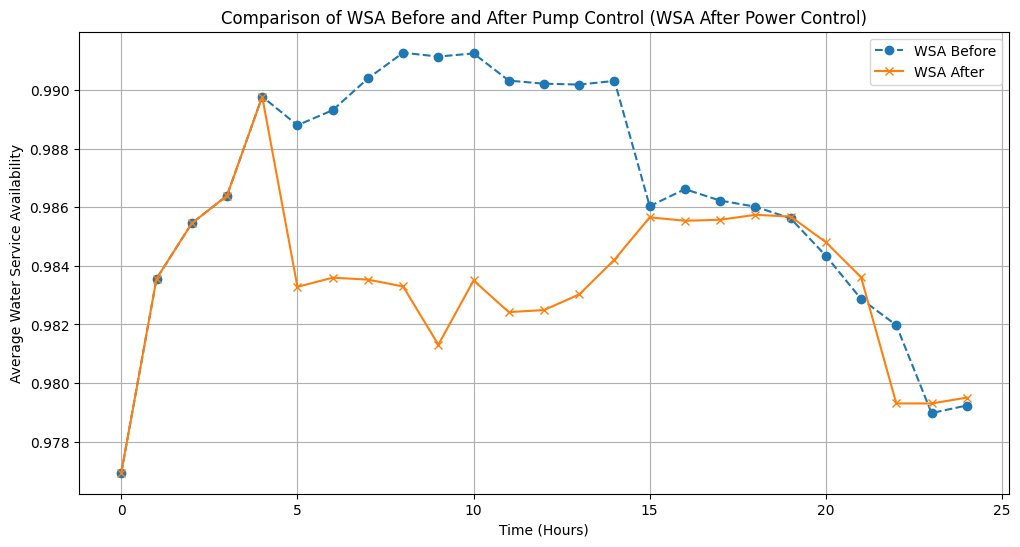

In [40]:

pump_names = ['10','335']
simulatePumpControl('Net3.inp', pump_names, shut_time=5, on_time=25, requiredPressure=average_pressure, title_before="WSA Before Power Control", title_after="WSA After Power Control")


Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


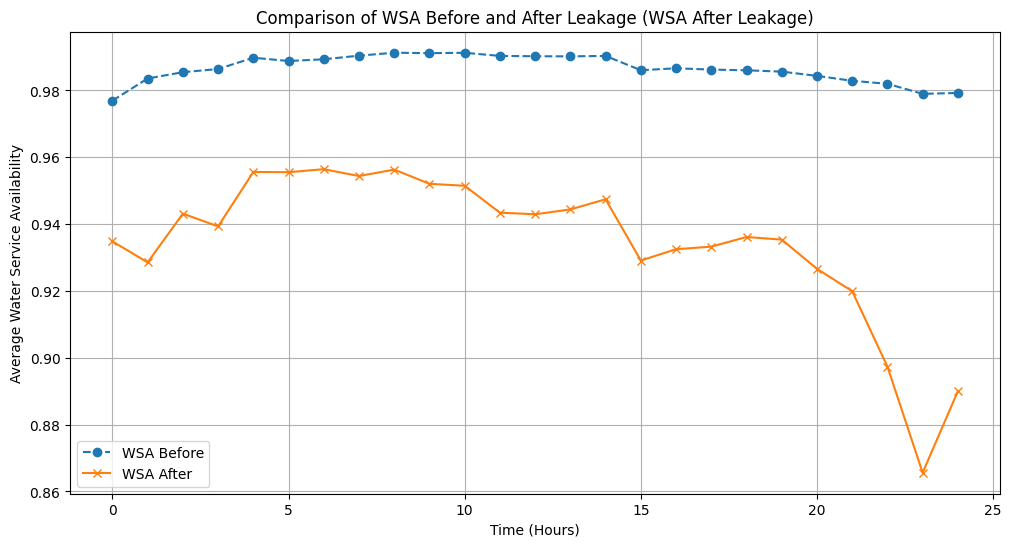

In [41]:
def simulatePipeLeakageForCriticalJunctions(wn_file, leak_factor, requiredPressure, threshold_population=100, threshold_wsa=0.8, title_before="WSA Before Leakage", title_after="WSA After Leakage"):
    """
    Simulates pipe leakage only for pipes connected to critical junctions.

    Parameters:
    - wn_file: INP file (network)
    - leak_factor: Factor by which to increase demand to simulate leakage.
    - requiredPressure: Required pressure for WSA calculation.
    - threshold_population: Minimum population threshold for identifying critical junctions.
    - threshold_wsa: Minimum WSA threshold for identifying critical junctions.
    - title_before: Title for the plot before the leakage.
    - title_after: Title for the plot after the leakage.
    """

    waterNetwork = load_network(wn_file)
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure


    sim_before = wntr.sim.EpanetSimulator(waterNetwork)
    results_before = sim_before.run_sim()

    expected_demand_before = wntr.metrics.expected_demand(waterNetwork)
    demand_before = results_before.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_before = wntr.metrics.water_service_availability(expected_demand_before, demand_before)

    critical_junctions = criticalJunctions(wn_file, requiredPressure, threshold_population, threshold_wsa)

    critical_junctions = critical_junctions[critical_junctions.index.isin(waterNetwork.junction_name_list)]

    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = pipe.start_node_name
        end_node = pipe.end_node_name
        

        if start_node in critical_junctions.index:
            waterNetwork.get_node(start_node).demand_timeseries_list[0].base_value *= leak_factor
        if end_node in critical_junctions.index:
            waterNetwork.get_node(end_node).demand_timeseries_list[0].base_value *= leak_factor


    sim_after = wntr.sim.EpanetSimulator(waterNetwork)
    results_after = sim_after.run_sim()

    expected_demand_after = wntr.metrics.expected_demand(waterNetwork)
    demand_after = results_after.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_after = wntr.metrics.water_service_availability(expected_demand_after, demand_after)

    plt.figure(figsize=(12, 6))
    plt.plot(wsa_before.index / 3600, wsa_before.mean(axis=1), label='WSA Before', linestyle='--', marker='o')
    plt.plot(wsa_after.index / 3600, wsa_after.mean(axis=1), label='WSA After', linestyle='-', marker='x')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Average Water Service Availability')
    plt.title(f'Comparison of WSA Before and After Leakage ({title_after})')
    plt.legend()
    plt.grid(True)
    plt.show()


simulatePipeLeakageForCriticalJunctions('Net3.inp', leak_factor=1.4, requiredPressure=average_pressure, threshold_population=100, threshold_wsa=0.8)


Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


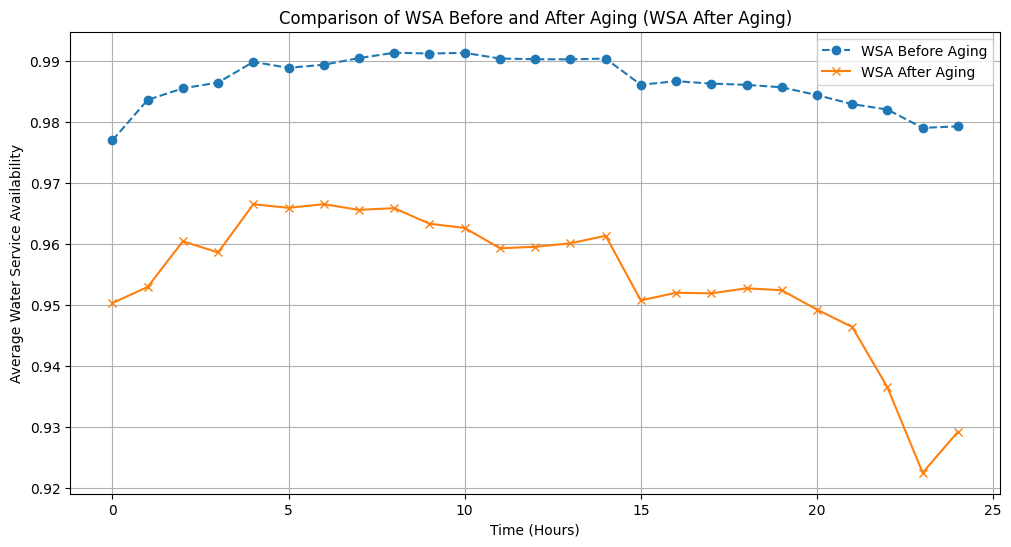

In [42]:
def simulateAgingInfrastructureForCriticalJunctions(wn_file, aging_factor, requiredPressure, threshold_population=100, threshold_wsa=0.8, title_before="WSA Before Aging", title_after="WSA After Aging"):
    """
    Simulates aging infrastructure by reducing pipe diameters for pipes connected to critical junctions and simulating pipe failures.

    Parameters:
    - wn_file: INP file (network)
    - aging_factor: Factor by which to reduce pipe diameters to simulate aging.
    - requiredPressure: Required pressure for WSA calculation.
    - threshold_population: Minimum population threshold for identifying critical junctions.
    - threshold_wsa: Minimum WSA threshold for identifying critical junctions.
    - title_before: Title for the plot before the aging effect.
    - title_after: Title for the plot after the aging effect.
    """
    

    waterNetwork = load_network(wn_file)
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure


    sim_before = wntr.sim.EpanetSimulator(waterNetwork)
    results_before = sim_before.run_sim()

    expected_demand_before = wntr.metrics.expected_demand(waterNetwork)
    demand_before = results_before.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_before = wntr.metrics.water_service_availability(expected_demand_before, demand_before)

    critical_junctions = criticalJunctions(wn_file, requiredPressure, threshold_population, threshold_wsa)

    critical_junctions = critical_junctions[critical_junctions.index.isin(waterNetwork.junction_name_list)]
    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = pipe.start_node_name
        end_node = pipe.end_node_name

        if start_node in critical_junctions.index or end_node in critical_junctions.index:
            pipe.diameter *= aging_factor


    sim_after = wntr.sim.EpanetSimulator(waterNetwork)
    results_after = sim_after.run_sim()

    expected_demand_after = wntr.metrics.expected_demand(waterNetwork)
    demand_after = results_after.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_after = wntr.metrics.water_service_availability(expected_demand_after, demand_after)

    plt.figure(figsize=(12, 6))
    plt.plot(wsa_before.index / 3600, wsa_before.mean(axis=1), label='WSA Before Aging', linestyle='--', marker='o')
    plt.plot(wsa_after.index / 3600, wsa_after.mean(axis=1), label='WSA After Aging', linestyle='-', marker='x')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Average Water Service Availability')
    plt.title(f'Comparison of WSA Before and After Aging ({title_after})')
    plt.legend()
    plt.grid(True)
    plt.show()

simulateAgingInfrastructureForCriticalJunctions('Net3.inp', aging_factor=0.8, requiredPressure=average_pressure, threshold_population=100, threshold_wsa=0.8) # 1 percent of the original's diameter


In [43]:
def simulateCombinedDisturbances(wn_file, pump_names, shut_time, on_time, leak_factor, aging_factor, requiredPressure, threshold_population=100, threshold_wsa=0.8, title="WSA Before and After Combined Disturbances"):
    """
    Simulates the combined effect of pump shutdowns, pipe leakage, and aging infrastructure for a given water network.
    
    Parameters:
    - wn_file: INP file (network)
    - pump_names: List of pump names to control
    - shut_time: Time (hours) when the pumps shut down
    - on_time: Time (hours) when the pumps turn back on
    - leak_factor: Factor by which to increase demand to simulate leakage.
    - aging_factor: Factor by which to reduce pipe diameters to simulate aging.
    - requiredPressure: Required pressure for WSA calculation.
    - threshold_population: Minimum population threshold for identifying critical junctions.
    - threshold_wsa: Minimum WSA threshold for identifying critical junctions.
    - title: Title for the plot.
    """

    waterNetwork = load_network(wn_file)
    waterNetwork.options.time.duration=48*3600
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure

    sim_before = wntr.sim.EpanetSimulator(waterNetwork)
    results_before = sim_before.run_sim()

    expected_demand_before = wntr.metrics.expected_demand(waterNetwork)
    demand_before = results_before.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_before = wntr.metrics.water_service_availability(expected_demand_before, demand_before)

    for pump_name in pump_names:
        addTimeBasedPumpControl(waterNetwork, pump_name, shut_time, on_time)

    critical_junctions = criticalJunctions(wn_file, requiredPressure, threshold_population, threshold_wsa)

    critical_junctions = critical_junctions[critical_junctions.index.isin(waterNetwork.junction_name_list)]

    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = pipe.start_node_name
        end_node = pipe.end_node_name

        if start_node in critical_junctions.index:
            waterNetwork.get_node(start_node).demand_timeseries_list[0].base_value *= leak_factor
        if end_node in critical_junctions.index:
            waterNetwork.get_node(end_node).demand_timeseries_list[0].base_value *= leak_factor

    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = pipe.start_node_name
        end_node = pipe.end_node_name

        if start_node in critical_junctions.index or end_node in critical_junctions.index:
            pipe.diameter *= aging_factor

    sim_after = wntr.sim.EpanetSimulator(waterNetwork)
    results_after = sim_after.run_sim()

    expected_demand_after = wntr.metrics.expected_demand(waterNetwork)
    demand_after = results_after.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_after = wntr.metrics.water_service_availability(expected_demand_after, demand_after)

    plt.figure(figsize=(12, 6))
    plt.plot(wsa_before.index / 3600, wsa_before.mean(axis=1), label='WSA Before', linestyle='--', marker='o')
    plt.plot(wsa_after.index / 3600, wsa_after.mean(axis=1), label='WSA After', linestyle='-', marker='x')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Average Water Service Availability')
    plt.title(f'{title}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return wsa_before,wsa_after,results_after



Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


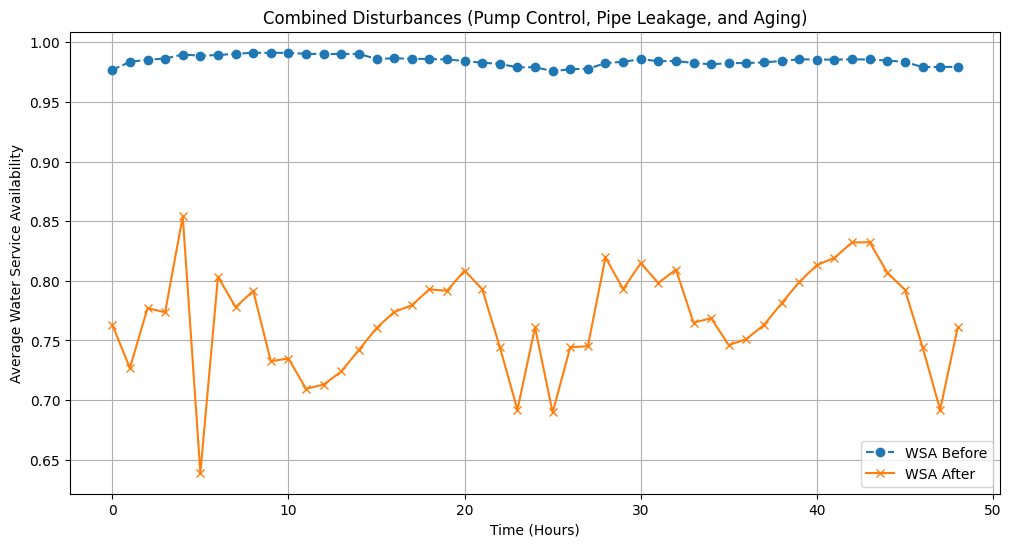

In [44]:

wsa_before,wsa_after,results_after=simulateCombinedDisturbances(
    'Net3.inp',
    pump_names=['10', '335'], 
    shut_time=5, on_time=20, 
    leak_factor=1.4, 
    aging_factor=0.7,
    requiredPressure=average_pressure,
    threshold_population=100, 
    threshold_wsa=0.8, 
    title="Combined Disturbances (Pump Control, Pipe Leakage, and Aging)"
)

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


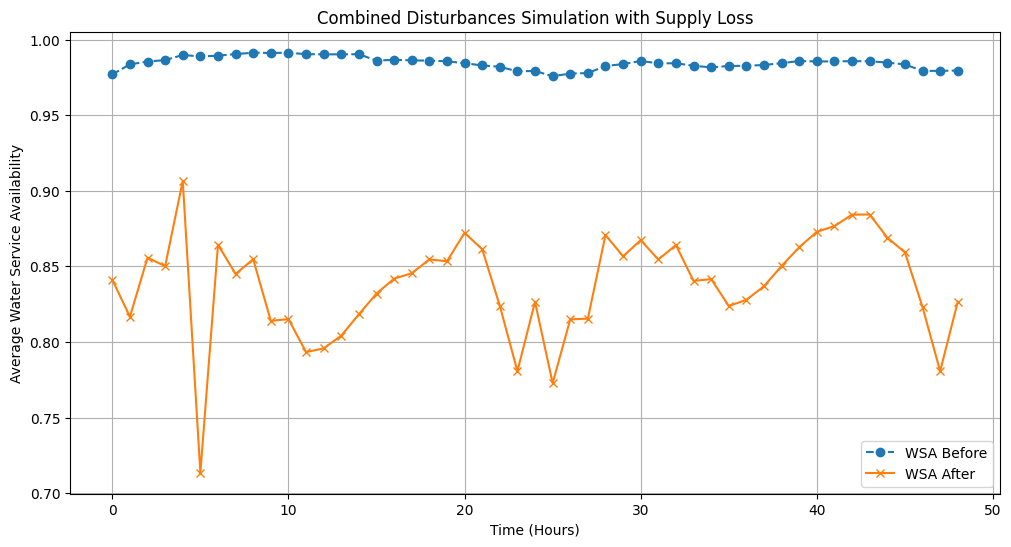

Water supply loss percentage: 14.90%


In [45]:
def calculate_supply_loss_percentage(wn_file, pump_names, shut_time, on_time, leak_factor, aging_factor, requiredPressure, threshold_population=100, threshold_wsa=0.8, title="WSA and Supply Loss Due to Disturbances"):
    """
    Calls simulateCombinedDisturbances and calculates the total water supply loss due to disturbances in percentage.

    Parameters:
    - wn_file: INP file (network)
    - pump_names: List of pump names to control
    - shut_time: Time (hours) when the pumps shut down
    - on_time: Time (hours) when the pumps turn back on
    - leak_factor: Factor by which to increase demand to simulate leakage.
    - aging_factor: Factor by which to reduce pipe diameters to simulate aging.
    - requiredPressure: Required pressure for WSA calculation.
    - threshold_population: Minimum population threshold for identifying critical junctions.
    - threshold_wsa: Minimum WSA threshold for identifying critical junctions.
    - title: Title for the plot.

    Returns:
    - wsa_before: Water service availability before disturbances
    - wsa_after: Water service availability after disturbances
    - supply_loss_percentage: Percentage of total water supply lost due to disturbances
    """

    wsa_before, wsa_after, _ = simulateCombinedDisturbances(
        wn_file, pump_names, shut_time, on_time, leak_factor, aging_factor, requiredPressure,
        threshold_population, threshold_wsa, title
    )

    
    total_expected_demand_before = wsa_before.mean(axis=1).sum()  
    total_actual_demand_after = wsa_after.mean(axis=1).sum()  

    supply_loss = total_expected_demand_before - total_actual_demand_after
    supply_loss_percentage = (supply_loss / total_expected_demand_before) * 100  
    
    
    return wsa_before, wsa_after, supply_loss_percentage

wsa_before, wsa_after, supply_loss_percentage = calculate_supply_loss_percentage(
    'Net3.inp',
    pump_names=['10', '335'], 
    shut_time=5, on_time=20,
    leak_factor=1.4, 
    aging_factor=0.8,  
    requiredPressure=average_pressure,
    threshold_population=100,
    threshold_wsa=0.8,
    title="Combined Disturbances Simulation with Supply Loss"
)

print(f"Water supply loss percentage: {supply_loss_percentage:.2f}%")


Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


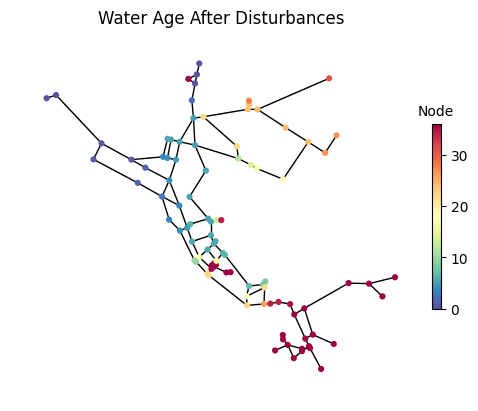

Average water age after disturbances: 18.58 hours


In [46]:
def checkWaterAgeAfterDisturbances(wn_file, pump_names, shut_time, on_time, leak_factor, aging_factor, requiredPressure, time_interval, threshold_population=100, threshold_wsa=0.8, title="Water Age After Disturbances"):
    """
    Simulates disturbances and checks water age after applying the disturbances.
    
    Parameters:
    - wn_file: INP file (network)
    - pump_names: List of pump names to control
    - shut_time: Time (hours) when the pumps shut down.
    - on_time: Time (hours) when the pumps turn back on.
    - leak_factor: Factor by which to increase demand to simulate leakage.
    - aging_factor: Factor by which to reduce pipe diameters to simulate aging.
    - requiredPressure: Required pressure for WSA calculation.
    - time_interval: Time interval (in hours) to calculate water age.
    - threshold_population: Minimum population threshold for identifying critical junctions.
    - threshold_wsa: Minimum WSA threshold for identifying critical junctions.
    - title: Title for the water age plot.

    Returns:
    - average_age_after_disturbance: Average water age after disturbances.
    """
    
    waterNetwork = load_network(wn_file)
    waterNetwork.options.time.duration = 48 * 3600
    waterNetwork.options.quality.parameter = 'AGE'
    waterNetwork.options.hydraulic.demand_model = 'PDD'
    waterNetwork.options.hydraulic.required_pressure = requiredPressure

    sim_before = wntr.sim.EpanetSimulator(waterNetwork)
    results_before = sim_before.run_sim()

    expected_demand_before = wntr.metrics.expected_demand(waterNetwork)
    demand_before = results_before.node['demand'].loc[:, waterNetwork.junction_name_list]
    wsa_before = wntr.metrics.water_service_availability(expected_demand_before, demand_before)

    for pump_name in pump_names:
        addTimeBasedPumpControl(waterNetwork, pump_name, shut_time, on_time)
    critical_junctions = criticalJunctions(wn_file, requiredPressure, threshold_population, threshold_wsa)

    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = pipe.start_node_name
        end_node = pipe.end_node_name

        if start_node in critical_junctions.index:
            waterNetwork.get_node(start_node).demand_timeseries_list[0].base_value *= leak_factor
        if end_node in critical_junctions.index:
            waterNetwork.get_node(end_node).demand_timeseries_list[0].base_value *= leak_factor
        if start_node in critical_junctions.index or end_node in critical_junctions.index:
            pipe.diameter *= aging_factor

    sim_after = wntr.sim.EpanetSimulator(waterNetwork)
    results_after = sim_after.run_sim()

    age = results_after.node['quality']
    age_in_interval = age.loc[age.index[-1] - time_interval * 3600 : age.index[-1]]  
    average_age_after_disturbance = age_in_interval.mean() / 3600 

    ax = wntr.graphics.plot_network(waterNetwork, node_attribute=average_age_after_disturbance, title=title)

    return average_age_after_disturbance

average_age_after_disturbance = checkWaterAgeAfterDisturbances(
    'Net3.inp',
    pump_names=['10', '335'],
    shut_time=5, on_time=20,
    leak_factor=1.4,
    aging_factor=0.8, 
    requiredPressure=average_pressure,
    time_interval=24,  
    threshold_population=100, 
    threshold_wsa=0.8,
    title="Water Age After Disturbances"
)

print(f"Average water age after disturbances: {average_age_after_disturbance.mean():.2f} hours")


# Applying resilience

In [47]:
critical_junctions=criticalJunctions('Net3.inp',average_pressure,100)

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


In [48]:

junction_coordinates = {}
for junction_name in waterNetwork.junction_name_list:
    junction = waterNetwork.get_node(junction_name)
    junction_coordinates[junction_name] = junction.coordinates


In [49]:
def analyze_pressure_and_flow(wn_file, required_pressure):
    """
    Analyze the pressure and flow in the network to identify potential locations for pumps and tanks.
    
    Parameters:
    - waterNetwork: The water network model.
    - required_pressure: The minimum required pressure in the system.
    
    Returns:
    - low_pressure_junctions: Junctions with pressure below the required level.
    - low_flow_pipes: Pipes with flow below a certain threshold (if needed).
    """
    waterNetwork=load_network(wn_file)
    try:

        sim = wntr.sim.EpanetSimulator(waterNetwork)
        results = sim.run_sim()
    except wntr.epanet.toolkit.EpanetException as e:
        print(f"Error during simulation: {e}")
        return None, None
        
    pressure = results.node['pressure'].loc[:, waterNetwork.junction_name_list]
    low_pressure_junctions = pressure.mean(axis=0)[pressure.mean(axis=0) < required_pressure]
    
    flow = results.link['flowrate'].loc[:, waterNetwork.pipe_name_list]
    low_flow_pipes = flow.mean(axis=0)[flow.mean(axis=0) < 0.1] 
    
    return low_pressure_junctions, low_flow_pipes

def print_network_summary(wn_file):
    """
    Print a summary of the water network to help diagnose potential issues.
    """
    waterNetwork=load_network(wn_file)
    print("Network Summary:")
    print("Junctions:", len(waterNetwork.junction_name_list))
    print("Pipes:", len(waterNetwork.pipe_name_list))
    print("Tanks:", len(waterNetwork.tank_name_list))
    print("Pumps:", len(waterNetwork.pump_name_list))

    for tank_name in waterNetwork.tank_name_list:
        tank = waterNetwork.get_node(tank_name)
        print(f"Tank {tank_name}: elevation = {tank.elevation}, init level = {tank.init_level}, max level = {tank.max_level}")
    
    for pump_name in waterNetwork.pump_name_list:
        pump = waterNetwork.get_link(pump_name)
        print(f"Pump {pump_name}: power = {pump}")

print_network_summary('Net3.inp')

low_pressure_junctions, low_flow_pipes = analyze_pressure_and_flow('Net3.inp', required_pressure=average_pressure)
pd.set_option('display.max_rows', None)
if low_pressure_junctions is not None:
    print("Low pressure junctions:", low_pressure_junctions)
    print("Low flow pipes:", low_flow_pipes)
else:
    print("Simulation failed. Check the network configuration.")

pd.reset_option('display.max_rows')

Network Summary:
Junctions: 92
Pipes: 117
Tanks: 3
Pumps: 2
Tank 1: elevation = 40.203120000000006, init level = 3.99288, max level = 9.784080000000001
Tank 2: elevation = 35.5092, init level = 7.162800000000001, max level = 12.28344
Tank 3: elevation = 39.3192, init level = 8.8392, max level = 10.820400000000001
Pump 10: power = 10
Pump 335: power = 335
Low pressure junctions: name
10     16.524345
15     35.570499
20      9.924546
40      5.836646
50      7.850260
101    37.968563
103    37.255573
127    32.254383
129    33.776566
139    39.074181
151    38.472958
153    28.520855
191    39.328514
204    39.916489
205    38.160202
208    39.115311
237    39.189007
239    39.449032
241    39.448624
243    39.143742
247    37.913013
249    37.913082
251    34.243763
253    32.369125
255    35.123940
dtype: float32
Low flow pipes: name
20    -0.021317
40    -0.005789
50     0.000538
103    0.066034
105    0.037354
107    0.015567
109    0.056955
111    0.041182
112    0.021604
113    0.

In [50]:
def add_adaptive_pumps(wn_file, low_pressure_junctions, max_pumps=6, pump_cost=10000, junction_cost=2000, min_pressure=20, max_pressure=50):
    waterNetwork = load_network(wn_file)
    pumps_added = 0
    total_cost = 0

    if 'pump_curve' not in waterNetwork.curve_name_list:
        pump_curve = [
            (0, 50),   # At zero flow, the pump provides 50 meters of head
            (50, 40),  # At 50 m³/h, the pump provides 40 meters of head
            (100, 25), # At 100 m³/h, the pump provides 25 meters of head
            (150, 10)  # At 150 m³/h, the pump provides 10 meters of head
        ]
        waterNetwork.add_curve('pump_curve', 'HEAD', pump_curve)

    # Run hydraulic simulation to get the head and pressure values
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()

    sorted_junctions = low_pressure_junctions.sort_values()
    for junction_name in sorted_junctions.index:
        if pumps_added >= max_pumps:
            break

        pump_name = f'pump_{junction_name}'
        new_junction_name = f'new_junction_{junction_name}'

        node = waterNetwork.get_node(junction_name)
        original_coords = node.coordinates

        neighbor_coords = None
        for pipe_name in waterNetwork.pipe_name_list:
            pipe = waterNetwork.get_link(pipe_name)
            if pipe.start_node_name == junction_name:
                neighbor_name = pipe.end_node_name
            elif pipe.end_node_name == junction_name:
                neighbor_name = pipe.start_node_name
            else:
                continue

            neighbor_coords = waterNetwork.get_node(neighbor_name).coordinates
            break

        if neighbor_coords:
            new_junction_coords = (
                (original_coords[0] + neighbor_coords[0]) / 2,
                (original_coords[1] + neighbor_coords[1]) / 2
            )
        else:
            new_junction_coords = (original_coords[0] + 1, original_coords[1] + 1)

        waterNetwork.add_junction(new_junction_name, elevation=node.elevation)
        waterNetwork.get_node(new_junction_name).coordinates = new_junction_coords

        waterNetwork.add_pump(
            name=pump_name,
            start_node_name=new_junction_name,
            end_node_name=junction_name,
            pump_type='HEAD',
            pump_parameter='pump_curve'
        )

        node_head = results.node['head'].loc[:, junction_name].mean()
        initial_pressure = node_head - node.elevation

        if initial_pressure < min_pressure:
            waterNetwork.get_link(pump_name).initial_status = 'OPEN'
        elif initial_pressure > max_pressure:
            waterNetwork.get_link(pump_name).initial_status = 'CLOSED'

        print(f"Pump '{pump_name}' status: {waterNetwork.get_link(pump_name).initial_status} based on initial pressure: {initial_pressure}")

        total_cost += pump_cost + junction_cost
        pumps_added += 1

    print(f"Total cost for adding {pumps_added} pumps: ${total_cost:.2f}")
    return waterNetwork, total_cost


updated_waterNetwork, total_pumps_cost = add_adaptive_pumps('Net3.inp', low_pressure_junctions, max_pumps=6) # change it to 30


Pump 'pump_40' status: Open based on initial pressure: 5.8366444042968695
Pump 'pump_50' status: Open based on initial pressure: 7.850258923339844
Pump 'pump_20' status: Open based on initial pressure: 9.924543896484373
Pump 'pump_10' status: Open based on initial pressure: 16.52435223999023
Pump 'pump_153' status: Open based on initial pressure: 28.520859842529294
Pump 'pump_127' status: Open based on initial pressure: 32.254388781738285
Total cost for adding 6 pumps: $72000.00


In [51]:
def add_tanks_with_correct_placement(waterNetwork, critical_junctions, max_tanks=2, tank_cost=20000):
    """
    Adds tanks at high elevation points, prioritizing critical junctions first.
    
    Parameters:
    - waterNetwork: The water network model.
    - critical_junctions: Series containing critical junctions with population and WSA.
    - max_tanks: Maximum number of tanks to add.
    - tank_cost: Cost per tank (default is 20000).
    
    Returns:
    - Updated water network with optimized tanks and total cost for adding tanks.
    """
    
    tanks_added = 0
    total_cost = 0
    elevation_dict = {} 
    non_critical_elevations = {}

    for junction_name in waterNetwork.junction_name_list:
        node = waterNetwork.get_node(junction_name)
        elevation = node.elevation
        if junction_name in critical_junctions.index:
            elevation_dict[junction_name] = elevation
        else:
            non_critical_elevations[junction_name] = elevation

    sorted_critical_junctions = sorted(elevation_dict.items(), key=lambda x: x[1], reverse=True)


    for junction_name, elevation in sorted_critical_junctions:
        if tanks_added >= max_tanks:
            break

        tank_name = f'tank_{junction_name}'
        node = waterNetwork.get_node(junction_name)
        original_coords = node.coordinates
        
        waterNetwork.add_tank(
            name=tank_name,
            elevation=elevation,
            init_level=5.0,
            min_level=2.0,
            max_level=8.0,
            diameter=20.0
        )
        waterNetwork.get_node(tank_name).coordinates = original_coords
        
        print(f"Added tank '{tank_name}' at critical junction '{junction_name}' with elevation {elevation}")
        tanks_added += 1
        total_cost += tank_cost

    if tanks_added < max_tanks:

        sorted_non_critical_junctions = sorted(non_critical_elevations.items(), key=lambda x: x[1], reverse=True)
        
        for junction_name, elevation in sorted_non_critical_junctions:
            if tanks_added >= max_tanks:
                break

            tank_name = f'tank_{junction_name}'
            node = waterNetwork.get_node(junction_name)
            original_coords = node.coordinates
            
            waterNetwork.add_tank(
                name=tank_name,
                elevation=elevation,
                init_level=5.0,
                min_level=2.0,
                max_level=8.0,
                diameter=20.0
            )
            waterNetwork.get_node(tank_name).coordinates = original_coords
            
            print(f"Added tank '{tank_name}' at non-critical junction '{junction_name}' with elevation {elevation}")
            tanks_added += 1
            total_cost += tank_cost

    print(f"Total cost for adding {tanks_added} tanks: ${total_cost:.2f}")
    return waterNetwork, total_cost

updated_waterNetwork, total_tank_cost = add_tanks_with_correct_placement(updated_waterNetwork, critical_junctions)


Added tank 'tank_153' at critical junction '153' with elevation 20.177760000000003
Added tank 'tank_127' at critical junction '127' with elevation 17.0688
Total cost for adding 2 tanks: $40000.00


In [52]:
def check_pressure_trend_with_sorted_average(wn_file, duration_hours=48, time_step_seconds=3600):
    """
    Simulates and checks the pressure trend at critical junctions and provides a sorted list of junction names based on average pressure.
    
    Parameters:
    - wn_file: The INP file of the water network
    - critical_junctions: List or series of critical junctions to monitor pressure
    - duration_hours: Duration of the simulation (default: 48 hours)
    - time_step_seconds: Time step for data collection (default: 3600 seconds)
    
    Returns:
    - A plot showing pressure trends at the critical junctions
    - A sorted list of junction names based on average pressure
    """
    
    waterNetwork = load_network(wn_file)
    waterNetwork.options.time.duration = duration_hours * 3600 
    
    sim = wntr.sim.EpanetSimulator(waterNetwork)
    results = sim.run_sim()

    pressure = results.node['pressure']

    avg_pressures = {}

    for junction in waterNetwork.junction_name_list:
        avg_pressures[junction] = pressure[junction].mean()
    
    sorted_pressures = sorted(avg_pressures.items(), key=lambda x: x[1], reverse=True)

    sorted_junction_names = [junction for junction, avg_pressure in sorted_pressures]
    

    print("Junctions sorted by average pressure:")
    for junction in sorted_junction_names:
        print(f"Junction {junction}")
    


    return sorted_junction_names
    

sorted_junction_names = check_pressure_trend_with_sorted_average(
    'Net3.inp',   
    duration_hours=48,
    time_step_seconds=3600
)

# sorted_junction_names[:20]
len(sorted_junction_names)

Junctions sorted by average pressure:
Junction 601
Junction 61
Junction 60
Junction 121
Junction 120
Junction 119
Junction 143
Junction 145
Junction 169
Junction 167
Junction 263
Junction 261
Junction 131
Junction 166
Junction 171
Junction 173
Junction 123
Junction 141
Junction 265
Junction 125
Junction 269
Junction 113
Junction 161
Junction 159
Junction 163
Junction 164
Junction 199
Junction 189
Junction 157
Junction 271
Junction 209
Junction 201
Junction 111
Junction 206
Junction 117
Junction 179
Junction 177
Junction 181
Junction 203
Junction 149
Junction 257
Junction 115
Junction 183
Junction 147
Junction 187
Junction 35
Junction 219
Junction 273
Junction 195
Junction 231
Junction 217
Junction 109
Junction 207
Junction 211
Junction 213
Junction 215
Junction 275
Junction 193
Junction 185
Junction 225
Junction 107
Junction 184
Junction 259
Junction 229
Junction 267
Junction 204
Junction 197
Junction 239
Junction 241
Junction 139
Junction 237
Junction 105
Junction 243
Junction 208
Jun

92

In [53]:
def install_prvs(waterNetwork, high_pressure_junctions, requiredPressure):
    """
    Installs PRVs (Pressure Reducing Valves) at high-pressure junctions, avoiding junctions connected to reservoirs.
    
    Parameters:
    - waterNetwork: The water network model
    - high_pressure_junctions: List of junctions with high pressure
    - requiredPressure: Desired pressure setting for PRVs
    
    Returns:
    - Updated water network model with PRVs installed
    - Total cost of PRV installations
    """
    total_cost = 0
    automated_valve_cost = 5000 


    reservoir_names = waterNetwork.reservoir_name_list
    
    for junction_name in high_pressure_junctions:
        valve_name = f'PRV_{junction_name}'

        node = waterNetwork.get_node(junction_name)
        connected_links = waterNetwork.get_links_for_node(junction_name)
    
        skip = False
        for pipe_name in connected_links:
            pipe = waterNetwork.get_link(pipe_name)
            if pipe.start_node_name in reservoir_names or pipe.end_node_name in reservoir_names:
                print(f"Skipping PRV at junction {junction_name} due to connection with reservoir")
                skip = True
                break
        
        if skip:
            continue
        
        pipe_name = connected_links[0]
        pipe = waterNetwork.get_link(pipe_name)
        
        waterNetwork.add_valve(
            name=valve_name, 
            start_node_name=pipe.start_node_name, 
            end_node_name=pipe.end_node_name, 
            valve_type='PRV', 
            diameter=0.5
        )

        waterNetwork.get_link(valve_name).initial_setting = requiredPressure
        
        total_cost += automated_valve_cost

    print(f"Total cost of PRV installation: ${total_cost:.2f}")
    return waterNetwork, total_cost
high_pressure_junctions=sorted_junction_names[:20:4]

updated_waterNetwork, total_prv_cost = install_prvs(updated_waterNetwork, high_pressure_junctions, requiredPressure=average_pressure)


Total cost of PRV installation: $25000.00


In [54]:
def add_loops_to_critical_areas(waterNetwork, critical_junctions, loop_count=3, pipe_cost_per_meter=100, fixed_installation_cost=500):
    """
    Adds multiple loops to create alternative flow paths in critical areas of a water network and calculates the cost.
    
    Parameters:
    - wn_file: The INP file of the network.
    - critical_junctions: List or Series of junctions considered critical based on population/demand.
    - loop_count: Number of loops to add (default is 3).
    - pipe_cost_per_meter: Cost per meter of pipe (default is $100 per meter).
    - fixed_installation_cost: Fixed installation cost per pipe (default is $500).
    
    Returns:
    - Updated water network model.
    - Total cost of the loops added.
    """

    total_cost = 0
    pipes_to_loop = []
    
    for pipe_name in waterNetwork.pipe_name_list:
        pipe = waterNetwork.get_link(pipe_name)
        start_node = waterNetwork.get_node(pipe.start_node_name)
        end_node = waterNetwork.get_node(pipe.end_node_name)
        
        if isinstance(start_node, wntr.network.Junction) and isinstance(end_node, wntr.network.Junction):
            if start_node.name in critical_junctions.index or end_node.name in critical_junctions.index:
                pipes_to_loop.append(pipe_name)
                
    new_pipes_added = 0
    for pipe_name in pipes_to_loop:
        if new_pipes_added >= loop_count:
            break
        
        pipe = waterNetwork.get_link(pipe_name)
        start_node = waterNetwork.get_node(pipe.start_node_name)
        end_node = waterNetwork.get_node(pipe.end_node_name)
        
        for neighbor_pipe_name in waterNetwork.pipe_name_list:
            if neighbor_pipe_name == pipe_name:
                continue
            neighbor_pipe = waterNetwork.get_link(neighbor_pipe_name)
            neighbor_start_node = waterNetwork.get_node(neighbor_pipe.start_node_name)
            neighbor_end_node = waterNetwork.get_node(neighbor_pipe.end_node_name)
        
            if isinstance(neighbor_start_node, wntr.network.Junction):
                if start_node.name != neighbor_start_node.name and end_node.name != neighbor_start_node.name:
                    new_pipe_name = f'new_pipe_{start_node.name}_{neighbor_start_node.name}'
                    print(f"Adding pipe {new_pipe_name} to create a loop.")
            
                    length = 300 
                    diameter = 0.3  
                    waterNetwork.add_pipe(new_pipe_name, start_node.name, neighbor_start_node.name, length=length, diameter=diameter)
                    new_pipes_added += 1
            
                    pipe_cost = length * pipe_cost_per_meter + fixed_installation_cost
                    total_cost += pipe_cost
                    print(f"Added {new_pipe_name} with a cost of ${pipe_cost:.2f}.")
                    break

    print(f"Total cost of adding loops: ${total_cost:.2f}")
    return waterNetwork, total_cost

critical_junctions = criticalJunctions('Net3.inp', requiredPressure=30, threshold_population=100, threshold_wsa=0.8)
updated_waterNetwork, total_looping_cost = add_loops_to_critical_areas(updated_waterNetwork, critical_junctions, loop_count=8)



Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64
Adding pipe new_pipe_10_105 to create a loop.
Added new_pipe_10_105 with a cost of $30500.00.
Adding pipe new_pipe_101_10 to create a loop.
Added new_pipe_101_10 with a cost o

In [55]:
# Save changes to a new resilient network

In [57]:
def save_network_to_inp_file(waterNetwork, file_name):
    wntr.network.io.write_inpfile(waterNetwork, file_name)
    print(f"Network saved to {file_name}")

save_network_to_inp_file(updated_waterNetwork, 'result1.inp')


Network saved to result1.inp


In [58]:
wn=load_network('final31.inp')

In [59]:
wn.describe(level=3)

{'Nodes': {'Junctions': 98, 'Tanks': 5, 'Reservoirs': 2},
 'Links': {'Pipes': 124,
  'Pumps': {'Head': 8, 'Power': 0},
  'Valves': {'PRV': 5, 'PSV': 0, 'PBV': 0, 'TCV': 0, 'FCV': 0, 'GPV': 0}},
 'Patterns': 5,
 'Curves': {'Pump': 3, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 6}

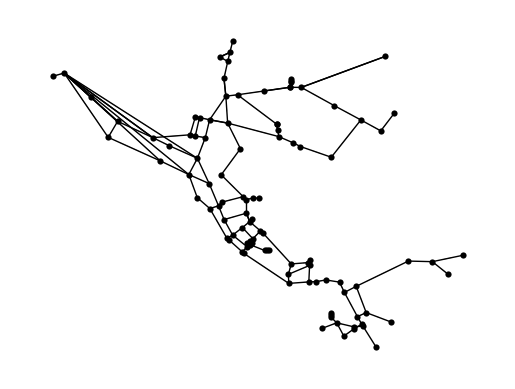

<Axes: >

In [60]:
wntr.graphics.plot_network(wn)

# Applying disturbance after resilience

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


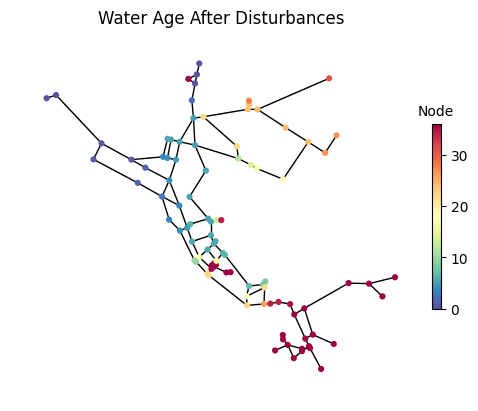

Average water age after disturbances before resilience: 18.58 hours


In [61]:
average_age_after_disturbance = checkWaterAgeAfterDisturbances(
    'Net3.inp',
    pump_names=['10', '335'],
    shut_time=5, on_time=20,
    leak_factor=1.4,
    aging_factor=0.8, 
    requiredPressure=average_pressure,
    time_interval=24,  
    threshold_population=100, 
    threshold_wsa=0.8,
    title="Water Age After Disturbances"
)
print(f"Average water age after disturbances before resilience: {average_age_after_disturbance.mean():.2f} hours")

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


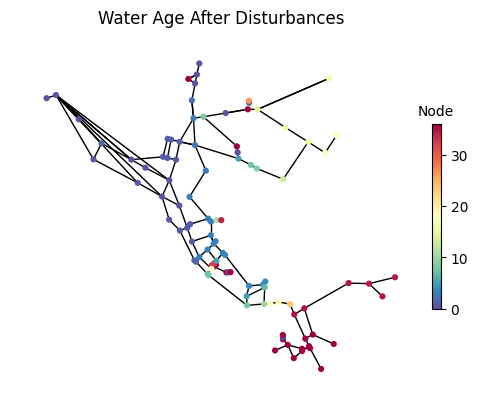

Average water age after disturbances after resilience: 13.71 hours


In [66]:
average_age_after_disturbance = checkWaterAgeAfterDisturbances(
    'result1.inp',
    pump_names=['10', '335'],
    shut_time=5, on_time=20,
    leak_factor=1.4,
    aging_factor=0.8, 
    requiredPressure=average_pressure,
    time_interval=24,  
    threshold_population=100, 
    threshold_wsa=0.8,
    title="Water Age After Disturbances"
)
print(f"Average water age after disturbances after resilience: {average_age_after_disturbance.mean():.2f} hours")

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


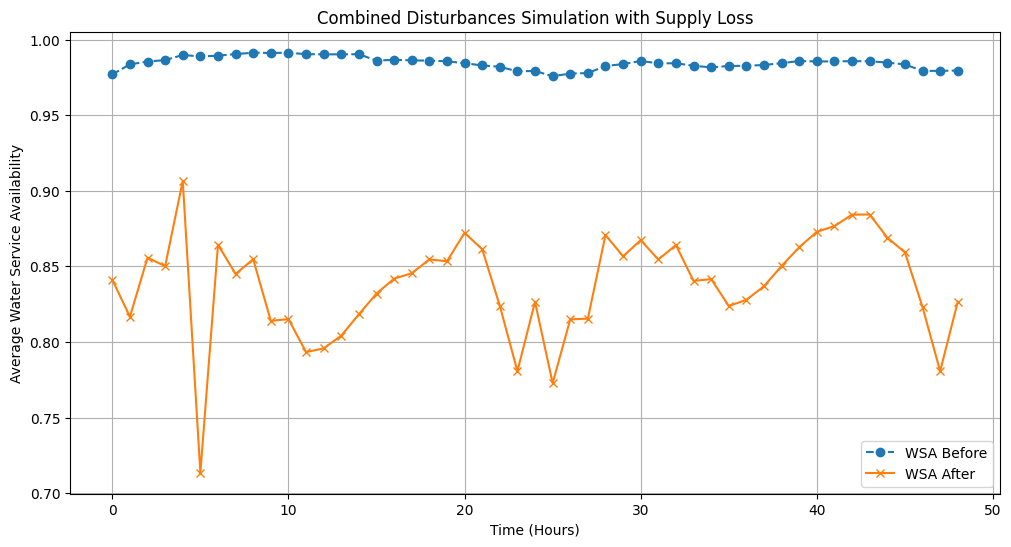

Water supply loss percentage before resilience: 14.90%


In [67]:
wsa_before, wsa_after, supply_loss_percentage = calculate_supply_loss_percentage(
    'Net3.inp',
    pump_names=['10', '335'], 
    shut_time=5, on_time=20,
    leak_factor=1.4, 
    aging_factor=0.8,  
    requiredPressure=average_pressure,
    threshold_population=100,
    threshold_wsa=0.8,
    title="Combined Disturbances Simulation with Supply Loss"
)

print(f"Water supply loss percentage before resilience: {supply_loss_percentage:.2f}%")

Critical Junctions based on population > 100 and WSA > 0.8:
15      1902.0
35     12371.0
101     1463.0
103     1026.0
105     1043.0
107      421.0
109     1782.0
111     1093.0
113      154.0
115      401.0
117      907.0
119     1357.0
121      321.0
123     8596.0
125      351.0
127      136.0
131      329.0
145      213.0
149      208.0
151     1113.0
153      340.0
157      399.0
159      318.0
161      122.0
167      112.0
171      303.0
177      448.0
185      198.0
189      831.0
191      631.0
193      549.0
197      131.0
199      919.0
201      344.0
203    32486.0
205      503.0
207      534.0
213      107.0
215      710.0
217      187.0
219      318.0
225      176.0
229      494.0
231      127.0
237      120.0
239      344.0
247      542.0
251      186.0
253      420.0
255      311.0
dtype: float64


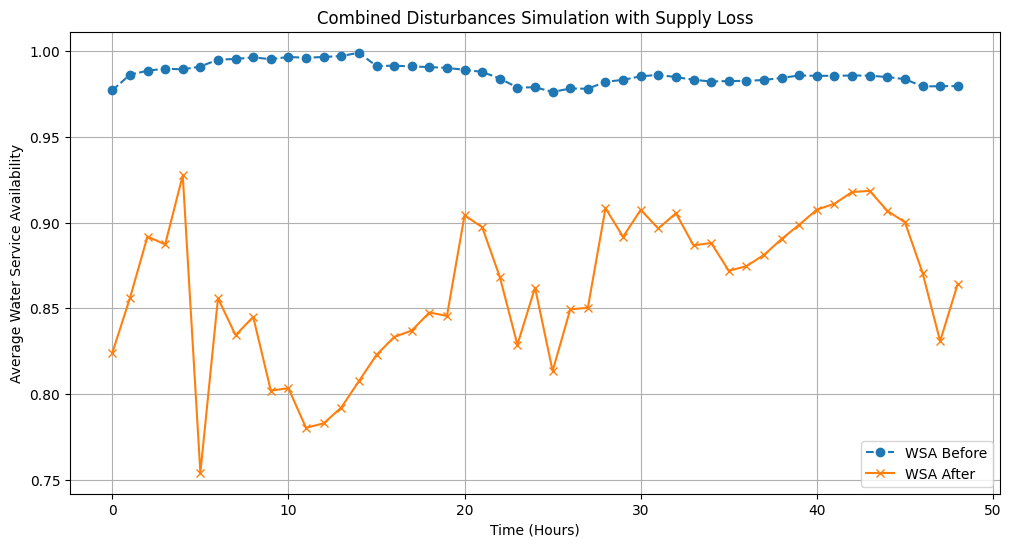

Water supply loss percentage after resilience: 12.64%


In [68]:
wsa_before, wsa_after, supply_loss_percentage = calculate_supply_loss_percentage(
    'result1.inp',
    pump_names=['10', '335'], 
    shut_time=5, on_time=20,
    leak_factor=1.4, 
    aging_factor=0.8,  
    requiredPressure=average_pressure,
    threshold_population=100,
    threshold_wsa=0.8,
    title="Combined Disturbances Simulation with Supply Loss"
)

print(f"Water supply loss percentage after resilience: {supply_loss_percentage:.2f}%")

# Cost for resilience

In [69]:
totalCostforResilience=total_pumps_cost+total_tank_cost+total_prv_cost+total_looping_cost

In [70]:
print("The total Cost of adding resilience is:",totalCostforResilience)

The total Cost of adding resilience is: 381000
